<a href="https://colab.research.google.com/github/Ramki-Rks/My_Python-Code/blob/main/Self_Project_Insurance_Decisioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

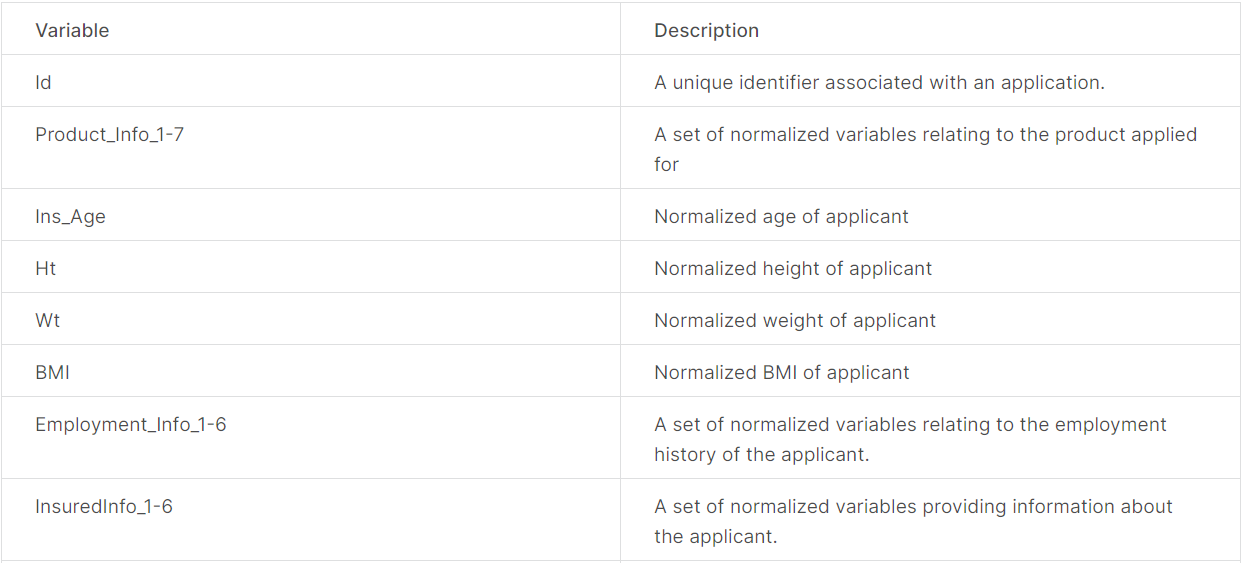

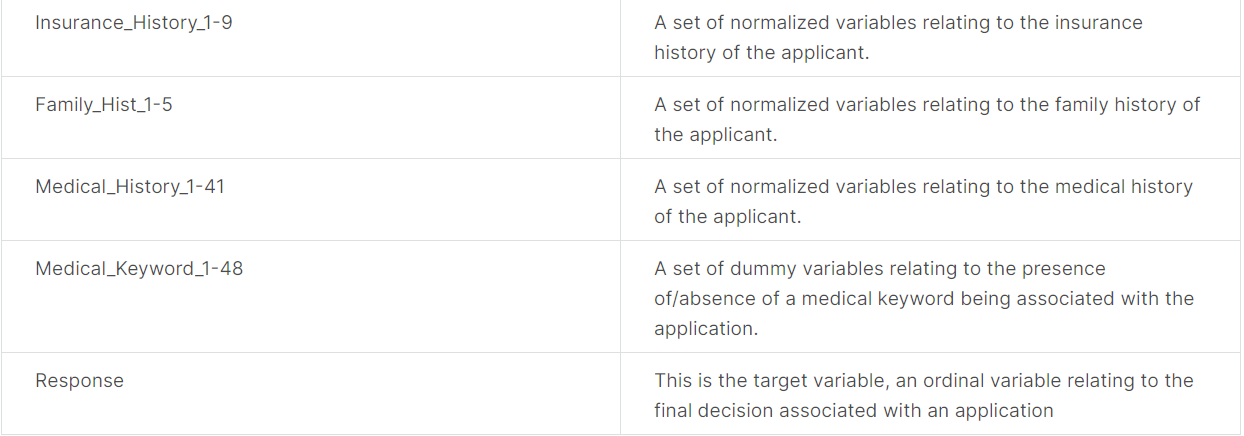

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Module 4/Assignment/Assignment_Data/insurance_train.csv",index_col='Id')
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
df.shape

(59381, 127)

In [ ]:
df.columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=127)

In [ ]:
df["Response"].value_counts()


8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [ ]:
df["Response"].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


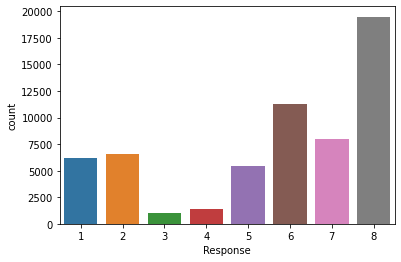

In [ ]:
sns.countplot(df["Response"])

In [ ]:
df.shape

(59381, 127)

In [ ]:
def modif_res(row):
  if ((row['Response'] <=7) & (row['Response'] >=0) ):
    val = 0
  elif (row['Response']==8):
    val = 1
  else:
    val = -1
  
  return val

In [ ]:
df["Modified_Response"]=df.apply(modif_res,axis = 1)

In [ ]:
df["Modified_Response"].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

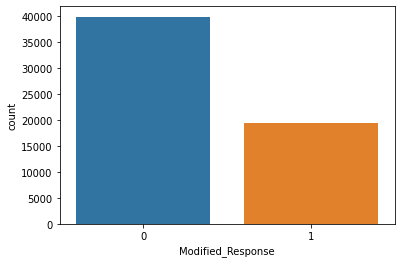

In [ ]:
sns.countplot(x=df["Modified_Response"])

In [ ]:
df.drop("Response",inplace=True,axis=1)

In [ ]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,1
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,1
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,1
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.describe(include="all")

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
count,59381.000000,59381,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
unique,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.026355,NaN,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,0.328203
std,0.160191,NaN,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,0.469563
min,1.000000,NaN,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
pd.set_option("display.max_columns",150)
pd.set_option("display.max_rows",150)

In [ ]:
df.corr()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Product_Info_1,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,-0.037130,0.047371,0.032271,-0.039832,0.008507,-0.018840,0.011871,-0.041654,0.002911,0.002709,-0.047523,0.013376,-0.047975,0.011357,0.013058,0.007242,-0.008187,0.015076,0.010613,0.006753,0.012547,0.008191,-0.001294,-0.054089,-0.017769,-0.056415,-0.013988,0.022124,0.005200,-0.017654,-0.022528,0.005489,0.008830,-0.000740,-0.002164,0.002007,-0.155339,-0.001493,-0.004357,0.007037,0.003845,-0.030431,0.006451,0.004598,0.001497,-0.009154,0.008965,0.001156,-0.004913,0.034479,-0.020301,-0.020741,0.022710,0.012216,-0.009307,0.004215,-0.007327,-0.007955,0.040738,-0.055632,-0.024576,-0.005298,-0.025444,-0.008999,0.012726,0.022837,-0.004703,0.015176,-0.013485,0.003356,-0.021427,-0.008578,0.005124,-0.001615,0.019955,0.000738,-0.005704,-0.002277,0.010436,0.004590,-0.001816,0.000856,-0.036699,-0.002719,-0.000372,0.008864,-0.007173,0.004998,0.007143,0.001019,0.055918,-0.001985,-0.018417,0.004536,-0.005395,-0.004660,-0.008189,-0.008202,-0.008154,0.002827,-0.006149,0.001988,-0.003620,-0.004441,0.007081,-0.007272,0.002378,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,-0.019621
Product_Info_3,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,0.083288,0.151442,0.191771,-0.241939,-0.026332,-0.764707,-0.005204,-0.033652,0.019398,-0.004991,-0.056197,0.026939,-0.398228,0.029694,0.009949,0.010795,0.033448,-0.022591,0.020219,-0.038518,0.038793,-0.032734,0.020843,-0.010492,0.010921,-0.001724,0.006095,0.009945,-0.033661,-0.041289,-0.090907,-0.004510,-0.045986,-0.005644,-0.006406,0.027212,0.024096,0.005088,-0.001422,0.055416,0.004776,-0.015096,0.009401,-0.003260,-0.018012,-0.071991,0.046969,-0.0

In [ ]:
len(df)

59381

In [ ]:
df.isnull().sum()

Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
Insurance_History_7        0
Insurance_History_8        0
Insurance_History_9        0
Family_Hist_1              0
Family_Hist_2          28656
Family_Hist_3 

In [ ]:
#Dropping the columns with more than 40% null values
missing_val_count_by_column = df.isnull().sum()/len(df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [ ]:
missing_val_count_by_column

In [ ]:
df = df.dropna(thresh=df.shape[0]*0.4,how='all',axis=1)

In [ ]:
df.drop('Product_Info_2',axis=1,inplace=True)

In [ ]:
# Data for all the independent variables
X = df.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = df['Modified_Response']

In [ ]:
X = X.fillna(X.mean())

In [ ]:
X.shape, Y.shape

((59381, 120), (59381,))

In [ ]:
#spliiting dataset for build model
x_train,x_test,y_train, y_test=train_test_split(X,Y, test_size =0.25, random_state=1)

In [ ]:
# Check the shape of train dataset
print(x_train.shape,y_train.shape)

# Check the shape of test dataset
print(x_test.shape, y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


In [ ]:
y_test.head()

Id
63651    0
6330     1
15237    1
66154    1
4707     0
Name: Modified_Response, dtype: int64

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg=LogisticRegression()
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
lr_grid = GridSearchCV(estimator = log_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


lr_grid.fit(x_train, y_train) 

In [ ]:
lr_grid.best_estimator_

LogisticRegression(C=10)

In [ ]:
lr_optimal_model = lr_grid.best_estimator_

In [ ]:
"Logistic_Regressor":[round(accuracy_score(y_train, train_class_preds_lr),3),round(accuracy_score(y_test, test_class_preds_lr),3),
                                             round(precision_score(y_train, train_class_preds_lr),3),round(precision_score(y_test, test_class_preds_lr),3),
                                     round(recall_score(y_train, train_class_preds_lr),3),round(recall_score(y_test, test_class_preds_lr),3),round(f1_score(y_train, train_class_preds_lr),3),round(f1_score(y_test, test_class_preds_lr),3)
                                     ,round(lr_grid.score(x_train,y_train),3),round(lr_grid.score(x_test,y_test),3)]

In [ ]:
# Making predictions on train and test data

train_class_preds_lr = lr_optimal_model.predict(x_train)
test_class_preds_lr = lr_optimal_model.predict(x_test)


# Get the probabilities on train and test
train_preds_lr = lr_optimal_model.predict_proba(x_train)[:,1]
test_preds_lr = lr_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
test_class_preds_lr

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report

##Preparing Logistic Classificaion report

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds_lr)
test_accuracy = accuracy_score(y_test,test_class_preds_lr)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.7447625463118895
The accuracy on test dataset is 0.744375589384346


In [ ]:
# Use score method to get accuracy of model
score = lr_grid.score(x_test, y_test)
print(score)

0.744375589384346


In [ ]:
from sklearn import metrics

In [ ]:
#confusion matrix using Seaborn
cm_lr = metrics.confusion_matrix(y_test, test_class_preds_lr)
print(cm_lr)

[[8600 1385]
 [2410 2451]]


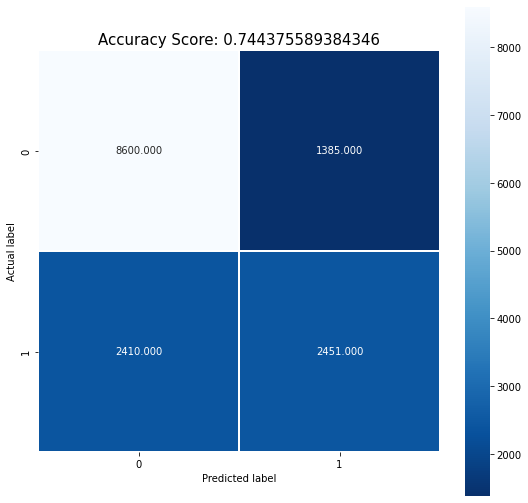

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_lr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
#precision
precision =((cm_lr[1][1])/((cm_lr[0][1])+(cm_lr[1][1])))
print(precision)

0.6389468196037539


In [ ]:
#recall
recall =((cm_lr[1][1])/((cm_lr[1][0])+(cm_lr[1][1])))
print(recall)

0.5042172392511829


## Training a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Provide the range of values for chosen hyperparameters

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(x_train,y_train)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.score(x_train,y_train)

0.8922851958563115

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(x_train)
test_class_preds = rf_optimal_model.predict(x_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(x_train)[:,1]
test_preds = rf_optimal_model.predict_proba(x_test)[:,1]

In [ ]:
len(train_preds)

44535

In [ ]:
test_class_preds

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8122151117098911
The accuracy on test dataset is 0.8060083524181598


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [ ]:
train_cm

array([[26958,  2949],
       [ 5414,  9214]])

In [ ]:
test_cm

array([[8982, 1003],
       [1877, 2984]])

In [ ]:
2854/(3798) - Precision
2854/(2854+2007) - Recall

In [ ]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [ ]:
train_auc

0.8922851958563115

In [ ]:
test_auc

0.8858374168947311

In [ ]:
rf_optimal_model.feature_importances_

array([2.50791190e-04, 2.82970717e-03, 3.81055205e-02, 1.75275581e-05,
       1.59878360e-04, 3.10521841e-05, 2.65403036e-02, 1.68919319e-02,
       1.57588528e-01, 2.59517304e-01, 2.60322858e-03, 1.30306861e-03,
       1.26052977e-03, 4.24859630e-04, 3.06463270e-03, 1.86833422e-03,
       2.69542328e-03, 1.13264622e-03, 5.37474799e-04, 2.49210912e-04,
       1.15776217e-03, 3.81153346e-02, 2.44803900e-03, 1.67001557e-04,
       1.05093263e-03, 4.07471610e-04, 3.71846198e-04, 2.30309791e-03,
       2.70018768e-04, 2.53999040e-04, 5.09273507e-04, 4.25499726e-03,
       1.02485562e-02, 4.83077430e-03, 1.21228286e-02, 7.72775150e-03,
       1.21219433e-03, 5.06396977e-04, 1.02207584e-01, 1.27344662e-04,
       7.60433060e-03, 3.18981215e-05, 6.01858619e-04, 2.00524726e-04,
       0.00000000e+00, 2.92821897e-05, 1.72061436e-03, 9.53496291e-06,
       4.20512999e-03, 1.62150293e-04, 1.29566865e-04, 4.61062638e-05,
       4.35697394e-04, 7.14388950e-05, 3.06273434e-06, 9.93170884e-02,
      

In [ ]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Product_Info_1,0.00
1,Product_Info_3,0.00
2,Product_Info_4,0.04
3,Product_Info_5,0.00
4,Product_Info_6,0.00


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
9,BMI,0.26
8,Wt,0.16
86,Medical_Keyword_15,0.11
38,Medical_History_4,0.10
55,Medical_History_23,0.10
...,...,...
43,Medical_History_9,0.00
42,Medical_History_8,0.00
41,Medical_History_7,0.00
39,Medical_History_5,0.00


##Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Create an instance of the GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Grid search
gbc_grid = GridSearchCV(estimator=gbc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

gbc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   8.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   8.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   8.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   8.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   8.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  13.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  13.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  13.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  13.6s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
gbc_grid.best_estimator_

GradientBoostingClassifier(max_depth=8, min_samples_leaf=40,
                           min_samples_split=150)

In [ ]:
gbc_grid.score(x_train,y_train)

0.9401011527403899

In [ ]:
gbc_optimal_model = gbc_grid.best_estimator_

In [ ]:
y_test_predict_gbc=gbc_optimal_model.predict(x_test)
y_train_predict_gbc=gbc_optimal_model.predict(x_train)

In [ ]:
# Accuracy of model and test
print("GBC train accuracy is %2.2f" % accuracy_score(y_train, y_train_predict_gbc))
print("GBC  train accuracy is %2.2f" % accuracy_score(
    y_test, y_test_predict_gbc))

GBC train accuracy is 0.87
GBC  train accuracy is 0.83


In [ ]:
# Test Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test, y_test_predict_gbc))

[[8715 1270]
 [1200 3661]]


In [ ]:
#precision
3661/(1270+3661)


0.7424457513688907

In [ ]:
#recall
3661/(3661+1200)

0.7531372145649043

In [ ]:
# Train Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_train, y_train_predict_gbc))

[[26695  3212]
 [ 2683 11945]]


In [ ]:
cm_gbv_test=confusion_matrix(y_test, y_test_predict_gbc)

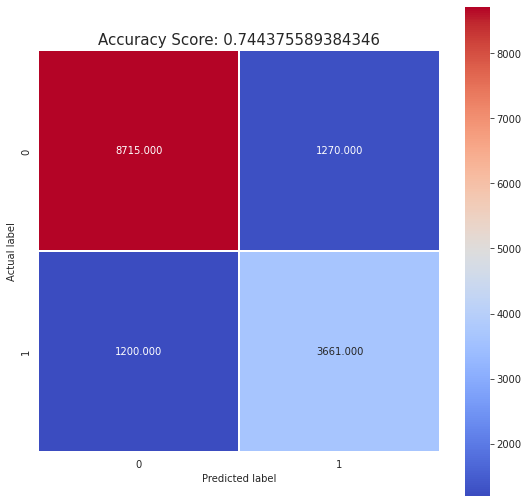

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_gbv_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
#confusion matrix using Seaborn for test
cm_gbv_tr = metrics.confusion_matrix(y_train, y_train_predict_gbc)
print(cm_gbv_tr)

[[26695  3212]
 [ 2683 11945]]


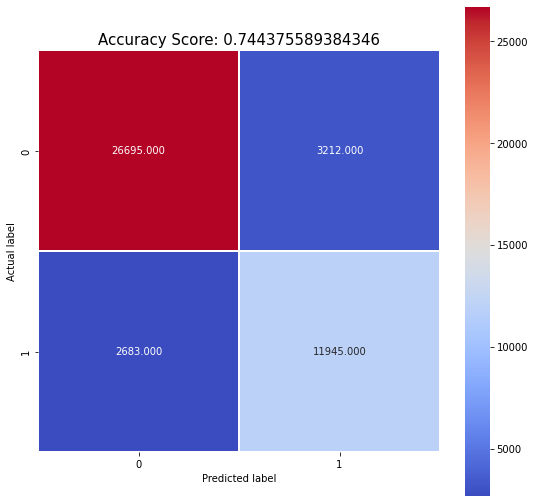

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_gbv_tr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##XGBoost Algorithm

In [ ]:
#importing XGBoost library
from xgboost import XGBClassifier

In [ ]:
# Create an instance of the XGBoost
xgb = XGBClassifier()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   9.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   9.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   9.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   9.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
xgb_grid.score(x_train,y_train)

0.941149117043621

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
y_test_predict_xgb=xgb_optimal_model.predict(x_test)
y_train_predict_xgb=xgb_optimal_model.predict(x_train)

In [ ]:
# Accuracy of model and test
print("GBC train accuracy is %2.2f" % accuracy_score(y_train, y_train_predict_xgb))
print("GBC  train accuracy is %2.2f" % accuracy_score(
    y_test, y_test_predict_xgb))

GBC train accuracy is 0.87
GBC  train accuracy is 0.84


In [ ]:
# Test Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test, y_test_predict_xgb))

[[8717 1268]
 [1160 3701]]


In [ ]:
#precision
3701/(1268+3701)


0.7448178707989536

In [ ]:
#recall
3701/(3701+1160 )

0.7613659740794075

In [ ]:
# Train Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_train, y_train_predict_xgb))

[[26555  3352]
 [ 2522 12106]]


In [ ]:
round(precision_score(y_test, y_test_predict_xgb),3)

0.745

In [ ]:
cm_gbv_test=confusion_matrix(y_test, y_test_predict_xgb)

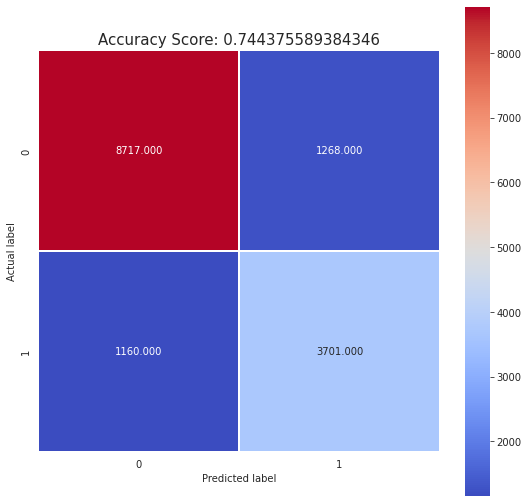

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_gbv_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
#confusion matrix using Seaborn for test
cm_gbv_tr = metrics.confusion_matrix(y_train, y_train_predict_xgb)
print(cm_gbv_tr)

[[26555  3352]
 [ 2522 12106]]


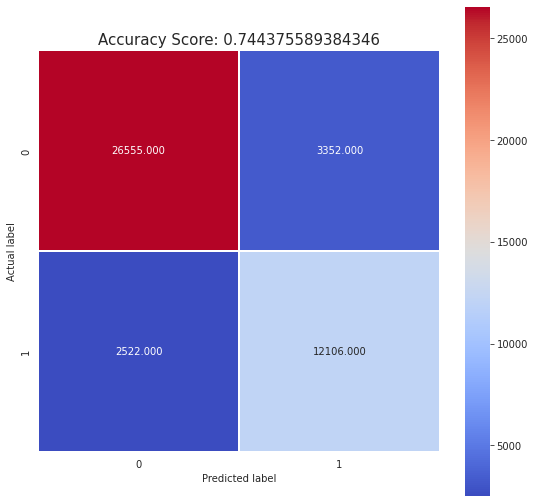

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_gbv_tr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##SHAP implementation

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 2.1 MB/s 


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import shap 
import graphviz
sns.set_style('darkgrid') 
shap.initjs()

In [ ]:
x_train.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=120)

In [ ]:
X_train=pd.DataFrame(x_train, columns=x_train.columns)
X_test=pd.DataFrame(x_test, columns=x_test.columns)
Y_train=pd.DataFrame(y_train, columns=["Modified_Response"])
Y_test=pd.DataFrame(y_test, columns=["Modified_Response"])

In [ ]:
Y_train

,Modified_Response
Id,
73752,0
37394,0
30327,1
11664,1
42086,1
...,...
66678,1
43139,0
6905,0


##1)SHAP-LogisticRegression

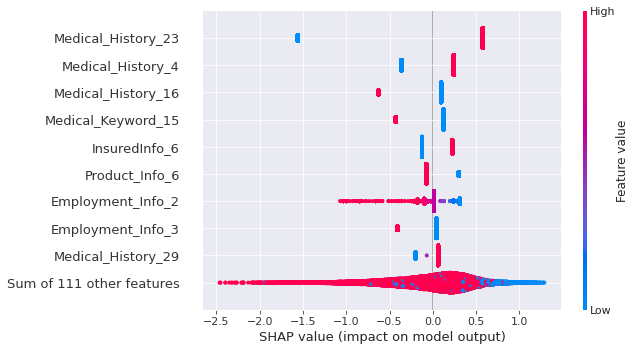

In [ ]:
explainer = shap.Explainer(lr_optimal_model, x_train)
shap_values = explainer(x_train)
shap.plots.beeswarm(shap_values)#, x_train feature_names=vectorizer.get_feature_names())

#2)SHAP-Random Forest Regression

In [ ]:
#visualization of SHAP
explainer=shap.TreeExplainer(rf_optimal_model)
shap_values=explainer.shap_values(x_train)


In [ ]:
shap_values[0]

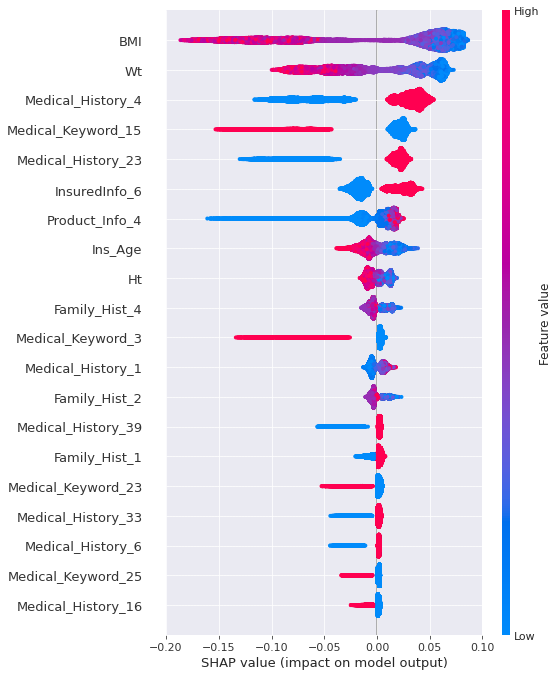

In [ ]:
#shap_values of 1 for positive label
shap.summary_plot(shap_values[1], x_train,plot_type="dot")

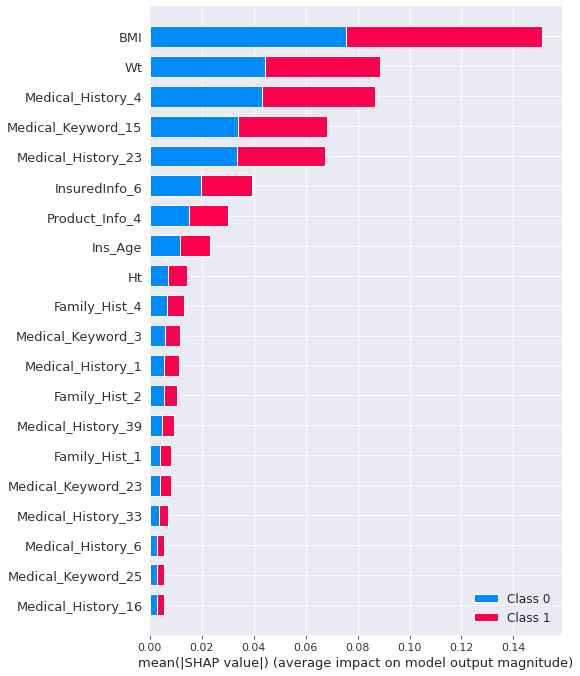

In [ ]:
# Obtain a Bar Summary Plot
shap_values = shap.TreeExplainer(rf_optimal_model).shap_values(X_test)
shap.summary_plot(shap_values, X_train,plot_type="bar")

#3)SHAP-GradientBoost ML

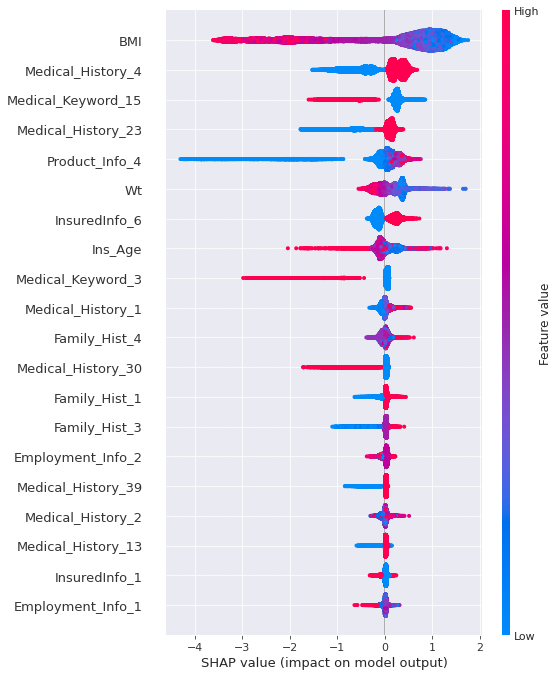

In [ ]:
#visualization of SHAP
explainer=shap.TreeExplainer(gbc_optimal_model)
shap_values=explainer.shap_values(x_train)
#shap_values of 1 for positive label
shap.summary_plot(shap_values, x_train)

##4)SHAP-XGBoost ML

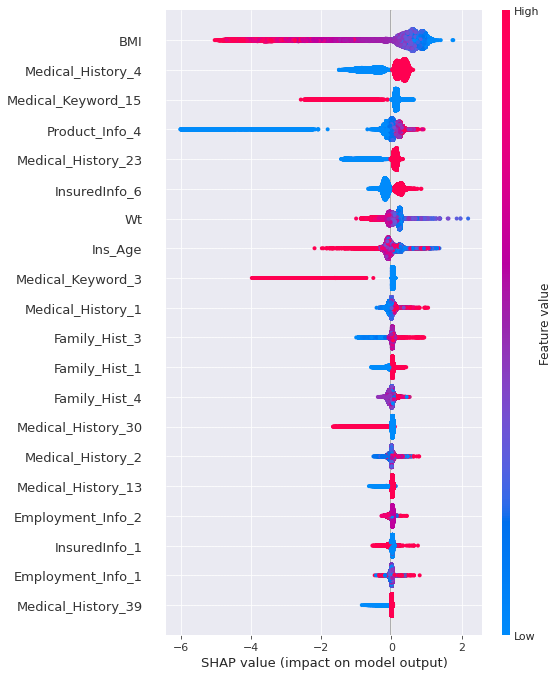

In [ ]:
#visualization of SHAP
explainer=shap.TreeExplainer(xgb_optimal_model)
shap_values=explainer.shap_values(x_train)
#shap_values of 1 for positive label
shap.summary_plot(shap_values, x_train)

##Summary Report of all Model 

In [ ]:
summary=pd.DataFrame({"Logistic_Regressor":[round(accuracy_score(y_train, train_class_preds_lr),3),round(accuracy_score(y_test, test_class_preds_lr),3),
                                             round(precision_score(y_train, train_class_preds_lr),3),round(precision_score(y_test, test_class_preds_lr),3),
                                     round(recall_score(y_train, train_class_preds_lr),3),round(recall_score(y_test, test_class_preds_lr),3),round(f1_score(y_train, train_class_preds_lr),3),round(f1_score(y_test, test_class_preds_lr),3)
                                     ,round(lr_grid.score(x_train,y_train),3),round(lr_grid.score(x_test,y_test),3),round(roc_auc_score(y_train,lr_optimal_model.predict_proba(x_train)[:,1]),3),round(roc_auc_score(y_test,lr_optimal_model.predict_proba(x_test)[:,1]),3)],
                      "Random_Forest_Classifier":[round(accuracy_score(y_train, train_class_preds),3),round(accuracy_score(y_test, test_class_preds),3),
                                             round(precision_score(y_train, train_class_preds),3),round(precision_score(y_test, test_class_preds),3),
                                     round(recall_score(y_train, train_class_preds),3),round(recall_score(y_test, test_class_preds),3),round(f1_score(y_train, train_class_preds),3),round(f1_score(y_test, test_class_preds),3)
                                     ,round(rf_grid.score(x_train,y_train),3),round(rf_grid.score(x_test,y_test),3),round(roc_auc_score(y_train,rf_optimal_model.predict_proba(x_train)[:,1]),3),round(roc_auc_score(y_test,rf_optimal_model.predict_proba(x_test)[:,1]),3)],
                      "Gradient_Boost_ML":[round(accuracy_score(y_train, y_train_predict_gbc),3),round(accuracy_score(y_test, y_test_predict_gbc),3),
                                             round(precision_score(y_train, y_train_predict_gbc),3),round(precision_score(y_test, y_test_predict_gbc),3),
                                     round(recall_score(y_train, y_train_predict_gbc),3),round(recall_score(y_test, y_test_predict_gbc),3),round(f1_score(y_train, y_train_predict_gbc),3),round(f1_score(y_test, y_test_predict_gbc),3)
                                     ,round(gbc_grid.score(x_train,y_train),3),round(gbc_grid.score(x_test,y_test),3),round(roc_auc_score(y_train,gbc_optimal_model.predict_proba(x_train)[:,1]),3),round(roc_auc_score(y_test,gbc_optimal_model.predict_proba(x_test)[:,1]),3)],
                      "XGBoost_ML":[round(accuracy_score(y_train, y_train_predict_xgb),3),round(accuracy_score(y_test, y_test_predict_xgb),3),
                                             round(precision_score(y_train, y_train_predict_xgb),3),round(precision_score(y_test, y_test_predict_xgb),3),
                                     round(recall_score(y_train, y_train_predict_xgb),3),round(recall_score(y_test, y_test_predict_xgb),3),round(f1_score(y_train, y_train_predict_xgb),3),round(f1_score(y_test, y_test_predict_xgb),3)
                                     ,round(xgb_grid.score(x_train,y_train),3),round(xgb_grid.score(x_test,y_test),3),round(roc_auc_score(y_train,xgb_optimal_model.predict_proba(x_train)[:,1]),3),round(roc_auc_score(y_test,xgb_optimal_model.predict_proba(x_test)[:,1]),3)]},
                     index=["Acc_Train","Acc_Test","Train_Precision","Test_Precision","Train_Recall","Test_Recall","Train_F1","Test_F1","Train_Score","Test_Score","Roc_auc_score_Train","Roc_auc_score_Test"])

In [ ]:
summary

,Logistic_Regressor,Random_Forest_Classifier,Gradient_Boost_ML,XGBoost_ML
Acc_Train,0.745,0.812,0.868,0.868
Acc_Test,0.744,0.806,0.834,0.836
Train_Precision,0.640,0.758,0.788,0.783
Test_Precision,0.639,0.748,0.742,0.745
Train_Recall,0.508,0.630,0.817,0.828
Test_Recall,0.504,0.614,0.753,0.761
Train_F1,0.567,0.688,0.802,0.805
Test_F1,0.564,0.675,0.748,0.753
Train_Score,0.745,0.892,0.940,0.941
Test_Score,0.744,0.886,0.909,0.910


## from the above pandas dataframe, comparison of all model showing that XGBoost model showing best result and its next to Gradient_Boost_ML followed by Random_Forest_Classifier,Logistic_Regression

#Time prediction to fit the model

will use this code for project..not now

In [ ]:
import time

In [ ]:
'''xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))'''